In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
titanic=pd.read_csv('/content/Titanic-Dataset.csv')

In [97]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

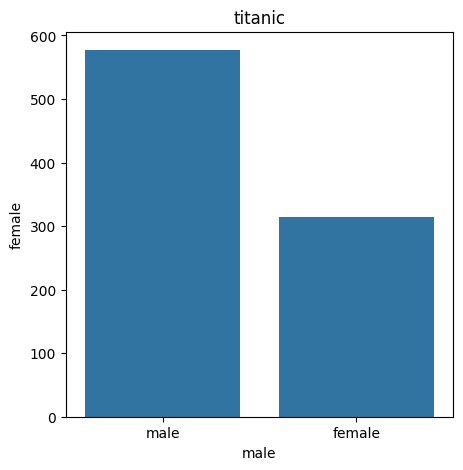

In [101]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic,x='Sex')
plt.title('titanic')
plt.xlabel('male')
plt.ylabel('female')
plt.show()

In [102]:
titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

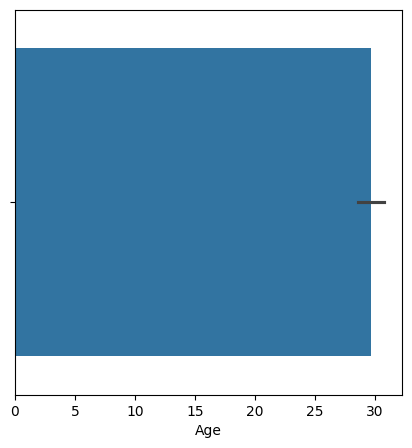

In [103]:
plt.figure(figsize=(5,5))
sns.barplot(data=titanic,x='Age')
plt.show()

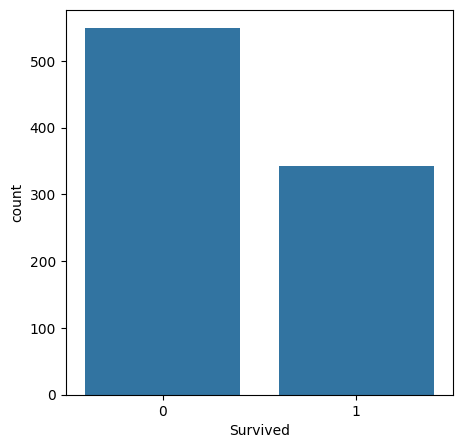

In [104]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic,x='Survived')
plt.show()

In [105]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [106]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

label1=label_encoder.fit_transform(titanic.Age)
label2=label_encoder.fit_transform(titanic.Name)
label3=label_encoder.fit_transform(titanic.Ticket)
label4=label_encoder.fit_transform(titanic.Embarked)
label5=label_encoder.fit_transform(titanic.Sex)
titanic['Age']=label1
titanic['Name']=label2
titanic['Ticket']=label3
titanic['Embarked']=label4
titanic['Sex']=label5

In [108]:
x=titanic.drop(columns=['Survived','Cabin'],axis=True)
y=titanic['Survived']

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [110]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
811,812,3,475,1,52,0,0,519,24.1500,2
29,30,3,813,1,36,0,0,362,7.8958,2
49,50,3,38,0,23,1,0,377,17.8000,2
105,106,3,542,1,36,0,0,354,7.8958,2
616,617,3,197,1,45,1,1,331,14.4000,2
...,...,...,...,...,...,...,...,...,...,...
218,219,1,72,0,42,0,0,63,76.2917,0
223,224,3,581,1,36,0,0,375,7.8958,2
271,272,3,817,1,33,0,0,574,0.0000,2
474,475,3,787,0,28,0,0,509,9.8375,2


In [111]:
y_train

811    0
29     0
49     0
105    0
616    0
      ..
218    1
223    0
271    1
474    0
355    0
Name: Survived, Length: 712, dtype: int64

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [114]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [115]:
y_predict=model.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_predict,y_test)

In [117]:
print('accuracy:',accuracy)

accuracy: 0.7821229050279329


In [118]:
from sklearn.metrics import classification_report
accuracy=classification_report(y_predict,y_test)
print('accuracy:',accuracy)

accuracy:               precision    recall  f1-score   support

           0       0.88      0.79      0.84       125
           1       0.61      0.76      0.68        54

    accuracy                           0.78       179
   macro avg       0.75      0.78      0.76       179
weighted avg       0.80      0.78      0.79       179

